# Linear Regression


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 1. 線性迴歸基本概念

#### 直線

$$f(x) = 1.2x + 0.8$$



In [3]:
#準備 50 個點
#5-0/50 = 0.1 +....
# 0~5線性切割
x = np.linspace(0, 5, 50)
print(x)

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]


In [4]:
y = 1.2*x + 0.8#預設y的值
y

array([0.8       , 0.92244898, 1.04489796, 1.16734694, 1.28979592,
       1.4122449 , 1.53469388, 1.65714286, 1.77959184, 1.90204082,
       2.0244898 , 2.14693878, 2.26938776, 2.39183673, 2.51428571,
       2.63673469, 2.75918367, 2.88163265, 3.00408163, 3.12653061,
       3.24897959, 3.37142857, 3.49387755, 3.61632653, 3.73877551,
       3.86122449, 3.98367347, 4.10612245, 4.22857143, 4.35102041,
       4.47346939, 4.59591837, 4.71836735, 4.84081633, 4.96326531,
       5.08571429, 5.20816327, 5.33061224, 5.45306122, 5.5755102 ,
       5.69795918, 5.82040816, 5.94285714, 6.06530612, 6.1877551 ,
       6.31020408, 6.43265306, 6.55510204, 6.67755102, 6.8       ])

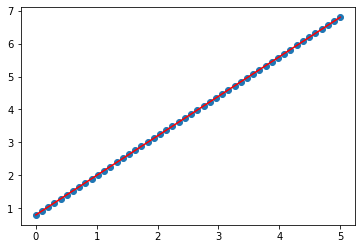

In [5]:
#畫圖
plt.scatter(x,y)
plt.plot(x, 1.2*x+0.8, 'r')

#### add noise 

$$f(x) + \varepsilon(x)$$


In [6]:
y = 1.2*x + 0.8 + 0.6*np.random.randn(50)#加上乾擾值，讓城市布要那麼方便預測
print(y)

[0.79007274 1.47244373 0.01596307 0.85406618 1.76605559 1.31788637
 2.17478073 1.31524591 2.15033426 1.85377859 3.47388308 2.25687305
 3.27777538 2.70519327 2.08034869 2.17685906 2.96450146 3.47491679
 3.15670303 3.48246185 2.36163751 1.87114097 4.05106654 4.82354374
 4.15754917 3.08483233 3.84618331 3.82555806 4.19382327 5.56788533
 5.57050313 5.31573539 5.07570933 4.72222321 4.83896463 4.89265205
 4.78456717 5.26795919 4.92236663 5.85555398 5.89527118 5.19625703
 6.0448311  5.37937079 5.86203386 6.22096117 6.373544   6.89099103
 7.31167051 6.61066127]


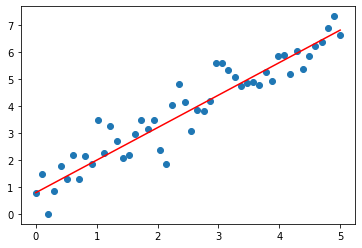

In [8]:
plt.scatter(x,y)
plt.plot(x, 1.2*x + 0.8, 'r')

In [9]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

In [10]:
regr

LinearRegression()

要求資料轉換<br>

$$[x_1, x_2, \ldots, x_{50}]$$

==> 

$$[[x_1], [x_2], \ldots, [x_{50}]]$$


矩陣的概念

In [13]:
print(x.shape)
X = x.reshape(-1,1)#把資料改成二維
X.shape

(50,)


(50, 1)

In [14]:
regr.fit(X,y)//用fit算出預測w和b

LinearRegression()

In [15]:
Y = regr.predict(X)
print(Y)#y是預測出來的值

[0.96642936 1.08500382 1.20357829 1.32215276 1.44072723 1.55930169
 1.67787616 1.79645063 1.91502509 2.03359956 2.15217403 2.27074849
 2.38932296 2.50789743 2.62647189 2.74504636 2.86362083 2.98219529
 3.10076976 3.21934423 3.33791869 3.45649316 3.57506763 3.69364209
 3.81221656 3.93079103 4.04936549 4.16793996 4.28651443 4.40508889
 4.52366336 4.64223783 4.7608123  4.87938676 4.99796123 5.1165357
 5.23511016 5.35368463 5.4722591  5.59083356 5.70940803 5.8279825
 5.94655696 6.06513143 6.1837059  6.30228036 6.42085483 6.5394293
 6.65800376 6.77657823]


In [17]:
#了解你的訓練參數 都是一些預測值
regr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

0.34644895727887925


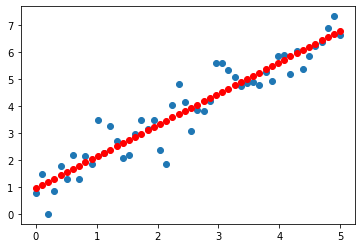

In [18]:
plt.scatter(x, y) #原本 
plt.plot(x, Y, 'ro') #預測
#calculate mse
mse = np.sum((Y-y)**2) / len(y)#誤差值
print(mse)

In [19]:
#Y=WX+b
W=regr.coef_#斜率
W
#f(x) = 1.2x + 0.8
#原本斜率是1.2 截距0.8


array([1.16202977])

In [20]:
b=regr.intercept_ #截距
b

0.9664293581025856

In [21]:
Y

array([0.96642936, 1.08500382, 1.20357829, 1.32215276, 1.44072723,
       1.55930169, 1.67787616, 1.79645063, 1.91502509, 2.03359956,
       2.15217403, 2.27074849, 2.38932296, 2.50789743, 2.62647189,
       2.74504636, 2.86362083, 2.98219529, 3.10076976, 3.21934423,
       3.33791869, 3.45649316, 3.57506763, 3.69364209, 3.81221656,
       3.93079103, 4.04936549, 4.16793996, 4.28651443, 4.40508889,
       4.52366336, 4.64223783, 4.7608123 , 4.87938676, 4.99796123,
       5.1165357 , 5.23511016, 5.35368463, 5.4722591 , 5.59083356,
       5.70940803, 5.8279825 , 5.94655696, 6.06513143, 6.1837059 ,
       6.30228036, 6.42085483, 6.5394293 , 6.65800376, 6.77657823])

In [22]:
#可以將新的x資料帶入算出結果
W*3+b

array([4.45251868])

In [23]:
y

array([0.79007274, 1.47244373, 0.01596307, 0.85406618, 1.76605559,
       1.31788637, 2.17478073, 1.31524591, 2.15033426, 1.85377859,
       3.47388308, 2.25687305, 3.27777538, 2.70519327, 2.08034869,
       2.17685906, 2.96450146, 3.47491679, 3.15670303, 3.48246185,
       2.36163751, 1.87114097, 4.05106654, 4.82354374, 4.15754917,
       3.08483233, 3.84618331, 3.82555806, 4.19382327, 5.56788533,
       5.57050313, 5.31573539, 5.07570933, 4.72222321, 4.83896463,
       4.89265205, 4.78456717, 5.26795919, 4.92236663, 5.85555398,
       5.89527118, 5.19625703, 6.0448311 , 5.37937079, 5.86203386,
       6.22096117, 6.373544  , 6.89099103, 7.31167051, 6.61066127])